In [1]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()

In [2]:
file_path

NameError: name 'file_path' is not defined

In [2]:
# Load CSV using Pandas
import pandas as pd
data = pd.read_csv('mushrooms.partial.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sbn

In [4]:
data.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,...,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,3365,2956,2602,1823,3802,2833,6331,5451,4496,1398,...,3944,3573,3502,6499,6340,5976,3154,1936,3218,2513


In [97]:
low_values = [[col, len(data[str(col)].unique())] for col in data.columns if len(data[str(col)].unique()) < 3]
values = []

for col in data.columns:
    values.append([col, data[str(col)].unique()])

<AxesSubplot:xlabel='class', ylabel='count'>

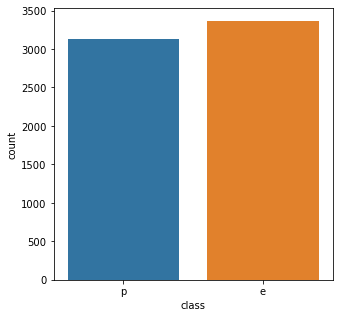

In [145]:
fig, ax = plt.subplots(figsize=(5,5))
sbn.countplot(data=data,x='class')

In [91]:
low_values

[['class', 2],
 ['bruises', 2],
 ['gill-attachment', 2],
 ['gill-spacing', 2],
 ['gill-size', 2],
 ['stalk-shape', 2],
 ['veil-type', 1]]

In [98]:
values

[['class', array(['p', 'e'], dtype=object)],
 ['cap-shape', array(['k', 'x', 'f', 'b', 's', 'c'], dtype=object)],
 ['cap-surface', array(['s', 'y', 'f', 'g'], dtype=object)],
 ['cap-color',
  array(['e', 'n', 'y', 'g', 'w', 'b', 'p', 'r', 'c', 'u'], dtype=object)],
 ['bruises', array(['f', 't'], dtype=object)],
 ['odor', array(['s', 'f', 'y', 'n', 'l', 'p', 'a', 'c', 'm'], dtype=object)],
 ['gill-attachment', array(['f', 'a'], dtype=object)],
 ['gill-spacing', array(['c', 'w'], dtype=object)],
 ['gill-size', array(['n', 'b'], dtype=object)],
 ['gill-color',
  array(['b', 'u', 'k', 'w', 'e', 'p', 'n', 'y', 'o', 'g', 'h', 'r'],
        dtype=object)],
 ['stalk-shape', array(['t', 'e'], dtype=object)],
 ['stalk-root', array(['?', 'b', 'c', 'e', 'r'], dtype=object)],
 ['stalk-surface-above-ring', array(['s', 'k', 'f', 'y'], dtype=object)],
 ['stalk-surface-below-ring', array(['k', 's', 'f', 'y'], dtype=object)],
 ['stalk-color-above-ring',
  array(['p', 'w', 'g', 'o', 'n', 'e', 'b', 'c', '

In [118]:
for v in low_values:
    print(v[0], ':', (data[v[0]].describe().freq / data[v[0]].describe().any()) * 100, '\n')

class : 51.77719649176796 

bruises : 58.50130789352208 

gill-attachment : 97.41498692106478 

gill-spacing : 83.87444222188029 

gill-size : 69.17987382674258 

stalk-shape : 56.962609632251116 

veil-type : 100.0 



In [127]:
data['gill-spacing'].value_counts()

c    5451
w    1048
Name: gill-spacing, dtype: int64

<AxesSubplot:xlabel='gill-attachment', ylabel='count'>

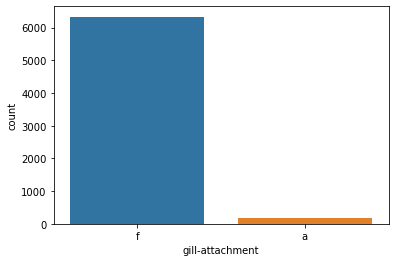

In [155]:
sbn.countplot(data=data,x='gill-attachment')

In [14]:
data.groupby('class').agg(data['gill-attachment'].sum())

AttributeError: 'ffffffffffffffffffafffffffaffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffafffffffffffffffaffffaffffffffffffffffffffffffffafffffafffffffffffffffaffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffafffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffaffffffffaffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffaffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffafffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffafffffffffffffffffaffffffffaffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffaffffafffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffafffffffffffffaffffffaffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffafffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffaffffffffffffffffffaafffffffffffffffffafffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffaffffaffffffffffffffffffffffffffffafffaffffffffffffffffffffffffffffffffffaffffffffffffffafffffffffffffffffffffffffafffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffafffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffafffffffffffffaffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffaffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffaffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffaffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffafffffffffffffffffffffffffffffffffafffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffaffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffafffffffffffffffffffaffffffffffffffffffffffffffffffffffffaffffffffffffffffffffaffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffafffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffaffffffffffffffffffffffffffffafffaffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffafffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffafffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffaffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffaffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffafffffffffffffffffffffafffffaffffffffffffffffaffffffffffaffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffafffffffffffafffffffffffffafffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffafafffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffafffffffafffaffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffaffffffffffffafffffffffffaffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffff' is not a valid function for 'DataFrameGroupBy' object

In [181]:
data['gill-attachment'].value_counts()

f    6331
a     168
Name: gill-attachment, dtype: int64

<AxesSubplot:xlabel='gill-attachment', ylabel='gill-spacing'>

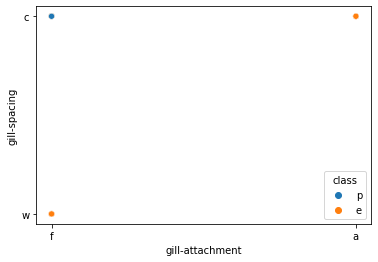

In [12]:
sbn.scatterplot(x=data['gill-attachment'], y=data['gill-spacing'], hue=data['class'])

In [7]:
con = pd.concat(data['class'], data['gill-attachment'])

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"

In [6]:
con

0       p
1       p
2       p
3       e
4       e
       ..
6494    f
6495    f
6496    f
6497    f
6498    f
Length: 12998, dtype: object

In [ ]:
#sns.swarmplot(x=data['class'],
              y=data['gill-attachment'])

In [180]:
data.groupby(['class', 'gill-attachment']).agg([len])

SyntaxError: invalid syntax (<ipython-input-180-b8c27495b9e5>, line 1)

In [169]:
.groupby('class').count()

KeyError: 'class'

In [166]:
data['gill-attachment'].sum()

'ffffffffffffffffffafffffffaffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffafffffffffffffffaffffaffffffffffffffffffffffffffafffffafffffffffffffffaffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffafffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffaffffffffaffffffffffff

In [165]:
pd.DataFrame(data['class'], data['gill-attachment'])

,class
gill-attachment,
f,NaN
f,NaN
f,NaN
f,NaN
f,NaN
...,...
f,NaN
f,NaN
f,NaN


In [163]:
sns.heatmap(data=pd.DataFrame(data['class'], data['gill-attachment'], annot=True)

ValueError: Must pass 2-d input. shape=()

In [160]:
sns.barplot(x=data['class'], y=data['gill-attachment'])

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [65]:
data_miss = data[].sum()

In [67]:
print(data_miss[data_miss > 0])

Series([], dtype: int64)


In [70]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,k,s,e,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,d
1,p,x,s,n,f,f,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
2,p,f,y,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
3,e,f,f,n,t,n,f,c,b,u,...,s,g,p,p,w,o,p,n,v,d
4,e,b,y,y,t,l,f,c,b,k,...,s,w,w,p,w,o,p,n,n,m


In [130]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

In [131]:
object_cols

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

## One-Hot Encoding Class 

In [137]:
data_one = data
train, test = train_test_split(data_one, test_size=0.2)
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = train.index
OH_cols_valid.index = test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = train.drop(object_cols, axis=1)
num_X_valid = test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)


In [139]:
OH_X_valid

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
3892,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4230,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
380,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1760,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5397,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
590,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
931,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
792,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [146]:
train

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1608,p,k,s,n,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,d
4127,e,f,y,e,t,n,f,c,b,u,...,s,g,w,p,w,o,p,n,v,d
101,p,x,f,y,f,f,f,c,b,p,...,k,n,p,p,w,o,l,h,v,p
5595,e,f,f,g,t,n,f,c,b,u,...,s,p,w,p,w,o,p,n,y,d
839,e,f,s,p,t,n,f,c,b,w,...,s,w,w,p,w,t,p,w,y,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5532,p,f,f,g,f,f,f,c,b,h,...,k,b,p,p,w,o,l,h,y,p
1768,e,b,s,w,t,l,f,c,b,w,...,s,w,w,p,w,o,p,n,n,g
4324,p,x,s,e,f,f,f,c,n,b,...,k,p,p,p,w,o,e,w,v,l
2804,e,f,f,e,t,n,f,c,b,n,...,s,p,w,p,w,o,p,k,y,d


In [147]:
test

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3892,e,k,s,w,f,n,f,w,b,g,...,s,w,w,p,w,t,p,w,s,g
4230,p,f,y,w,t,n,f,c,b,r,...,s,w,w,p,w,t,p,r,v,g
380,e,x,y,e,t,n,f,c,b,n,...,s,g,p,p,w,o,p,k,v,d
1760,e,f,s,p,t,n,f,c,b,w,...,s,w,w,p,w,t,e,w,c,w
5397,p,x,y,e,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,e,f,f,w,f,n,f,w,b,h,...,f,w,w,p,w,o,e,k,s,g
590,e,k,s,g,f,n,f,w,b,p,...,s,w,w,p,w,t,p,w,s,g
931,p,k,s,n,f,y,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
792,p,k,y,n,f,s,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l


In [148]:
test.to_csv('test.csv', index=False)

In [149]:
train.to_csv('train.csv', index=False)

In [150]:
train_data = pd.read_csv('train.csv')

In [151]:
train_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,k,s,n,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,d
1,e,f,y,e,t,n,f,c,b,u,...,s,g,w,p,w,o,p,n,v,d
2,p,x,f,y,f,f,f,c,b,p,...,k,n,p,p,w,o,l,h,v,p
3,e,f,f,g,t,n,f,c,b,u,...,s,p,w,p,w,o,p,n,y,d
4,e,f,s,p,t,n,f,c,b,w,...,s,w,w,p,w,t,p,w,y,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194,p,f,f,g,f,f,f,c,b,h,...,k,b,p,p,w,o,l,h,y,p
5195,e,b,s,w,t,l,f,c,b,w,...,s,w,w,p,w,o,p,n,n,g
5196,p,x,s,e,f,f,f,c,n,b,...,k,p,p,p,w,o,e,w,v,l
5197,e,f,f,e,t,n,f,c,b,n,...,s,p,w,p,w,o,p,k,y,d


In [152]:
test_data = pd.read_csv('test.csv')

In [153]:
test_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,k,s,w,f,n,f,w,b,g,...,s,w,w,p,w,t,p,w,s,g
1,p,f,y,w,t,n,f,c,b,r,...,s,w,w,p,w,t,p,r,v,g
2,e,x,y,e,t,n,f,c,b,n,...,s,g,p,p,w,o,p,k,v,d
3,e,f,s,p,t,n,f,c,b,w,...,s,w,w,p,w,t,e,w,c,w
4,p,x,y,e,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,e,f,f,w,f,n,f,w,b,h,...,f,w,w,p,w,o,e,k,s,g
1296,e,k,s,g,f,n,f,w,b,p,...,s,w,w,p,w,t,p,w,s,g
1297,p,k,s,n,f,y,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
1298,p,k,y,n,f,s,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l


In [25]:
1+1

2

In [26]:
import seaborn as sns

<AxesSubplot:xlabel='class', ylabel='gill-attachment'>

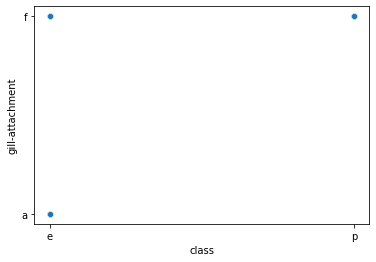

In [27]:
sns.scatterplot(x = test_data['class'], y = test_data['gill-attachment'])

In [44]:
f = sum(test_data['gill-attachment'] == 'f')

In [45]:
print(f)

1263


In [46]:
a = sum(test_data['gill-attachment'] == 'a')

In [47]:
print(a)

37


TypeError: Could not convert ffffffffffffffffffafffffffffffffffffffffffffffaffffafffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffafffffffffffafffaffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffffaaffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffffffffaffffffffffffffaffffffffafffffffffffffaffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffafaffffffffffffffffffffffffffffffffffffffffffffffffffffafaffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffaffffffffffffffffffffffffafffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffffffffffffffffffffaffffffafffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffafffffffff to numeric

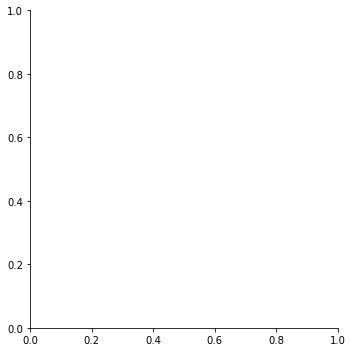

In [53]:
sns.lmplot(x="class", y="gill-attachment", hue="class", data=test_data)

In [48]:
t = train_data.sum()

In [49]:
t

class                       epeeepeppeppppeeeeeeppeppppeppeeppeeeeepppppee...
cap-shape                   ffxffxfffxfffxffxfxkkkxfkkfxxffxfxkkxffkxbkfxx...
cap-surface                 fysyysysyfyyyfyffffsyysysyyffysfysfsfyyyyysyys...
cap-color                   nnwgenenngngggneggnnenwennenwnnewpwegggenyngen...
bruises                     tffttttfffffffttftfffftfffftfffttffttttffffftf...
odor                        nsnnnpnssnyfffnnnnnnssasfsfncfnnpcnnnnnysnyfnn...
gill-attachment             fffffffffffffffffffaffffffffffafffffffffffffff...
gill-spacing                ccwccccccwccccccwccccccccccccccccwwccccccccccw...
gill-size                   bnbbbnbnnbnbbbbbbbnbnnbnnnnbnnbbnnbbbbbnnnnbbb...
gill-color                  wbnnwwwbbwbppguuwngobbkbbbbugbypknpwwnwbbwbhnn...
stalk-shape                 tttttettteteeetteteettettttteteteeeetttttetett...
stalk-root                  b?ebbeb????bbbbb?be???c????bb??beb??bbb????bbe...
stalk-surface-above-ring    skfssssskkskkkssssssksskskksssssssss

In [62]:
test_data['veil-type'].describe()

count     1300
unique       1
top          p
freq      1300
Name: veil-type, dtype: object

In [56]:
test_data['gill-attachment'].describe()

count     1300
unique       2
top          f
freq      1263
Name: gill-attachment, dtype: object

In [60]:
for col in test_data.columns:
    print(test_data[str(col)].describe())

count     1300
unique       2
top          e
freq       694
Name: class, dtype: object
count     1300
unique       6
top          x
freq       580
Name: cap-shape, dtype: object
count     1300
unique       3
top          y
freq       535
Name: cap-surface, dtype: object
count     1300
unique      10
top          n
freq       353
Name: cap-color, dtype: object
count     1300
unique       2
top          f
freq       754
Name: bruises, dtype: object
count     1300
unique       9
top          n
freq       573
Name: odor, dtype: object
count     1300
unique       2
top          f
freq      1263
Name: gill-attachment, dtype: object
count     1300
unique       2
top          c
freq      1100
Name: gill-spacing, dtype: object
count     1300
unique       2
top          b
freq       909
Name: gill-size, dtype: object
count     1300
unique      12
top          b
freq       276
Name: gill-color, dtype: object
count     1300
unique       2
top          t
freq       726
Name: stalk-shape, dtype: obj

In [61]:
test_data['gill-attachment'].counts()

AttributeError: 'Series' object has no attribute 'counts'